In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from datetime import datetime,timedelta,date

import warnings
warnings.filterwarnings("ignore")

In [2]:
train1 = pd.read_csv("train1-1568365584614.csv",header=0,parse_dates=['month'])
train2 = pd.read_csv("train2-1568365601370.csv",header =0,parse_dates=['month'])
train3 = pd.read_csv("train3-1568365612890.csv",header=0,parse_dates=['month'])
building_mt_d = pd.read_csv("building_to_mrt_distance-1568365651170.csv",header = 0)
test = pd.read_csv("test-1568365637039.csv",header=0,parse_dates=['month']) 

In [3]:
frames = [train1,train2,train3]
data = pd.concat(frames,axis=0)

In [4]:
data

,block,flat_model,flat_type,floor_area_sqm,lease_commence_date,month,remaining_lease,resale_price,storey_range,street_name,town,uniqueID
0,172,Improved,2 ROOM,45.0,1986,2012-03-01,NaN,250000.0,06 TO 10,ANG MO KIO AVE 4,ANG MO KIO,100000
1,510,Improved,2 ROOM,44.0,1980,2012-03-01,NaN,265000.0,01 TO 05,ANG MO KIO AVE 8,ANG MO KIO,100001
2,610,New Generation,3 ROOM,68.0,1980,2012-03-01,NaN,315000.0,06 TO 10,ANG MO KIO AVE 4,ANG MO KIO,100002
3,474,New Generation,3 ROOM,67.0,1984,2012-03-01,NaN,320000.0,01 TO 05,ANG MO KIO AVE 10,ANG MO KIO,100003
4,604,New Generation,3 ROOM,67.0,1980,2012-03-01,NaN,321000.0,06 TO 10,ANG MO KIO AVE 5,ANG MO KIO,100004
...,...,...,...,...,...,...,...,...,...,...,...,...
32573,325,Maisonette,EXECUTIVE,146.0,1988,2018-07-01,69 years 05 months,538000.0,04 TO 06,YISHUN CTRL,YISHUN,221929
32574,355,Maisonette,EXECUTIVE,146.0,1988,2018-07-01,69 years 04 months,590000.0,01 TO 03,YISHUN RING RD,YISHUN,221930
32575,614,Apartment,EXECUTIVE,142.0,1987,2018-07-01,67 years 10 months,620888.0,04 TO 06,YISHUN ST 61,YISHUN,221931
32576,834,Maisonette,EXECUTIVE,146.0,1988,2018-07-01,68 years 06 months,650000.0,10 TO 12,YISHUN ST 81,YISHUN,221932


In [5]:
data.to_csv("data.csv")

In [6]:
data.columns.tolist()

['block',
 'flat_model',
 'flat_type',
 'floor_area_sqm',
 'lease_commence_date',
 'month',
 'remaining_lease',
 'resale_price',
 'storey_range',
 'street_name',
 'town',
 'uniqueID']

In [7]:
test.columns.tolist()

['month',
 'town',
 'flat_type',
 'block',
 'street_name',
 'storey_range',
 'floor_area_sqm',
 'flat_model',
 'lease_commence_date',
 'remaining_lease',
 'uniqueID']

In [8]:
columns_check=[]
for i in test.columns.tolist():
    if i in data.columns.tolist():
        columns_check.append(i)

In [9]:
columns_check

['month',
 'town',
 'flat_type',
 'block',
 'street_name',
 'storey_range',
 'floor_area_sqm',
 'flat_model',
 'lease_commence_date',
 'remaining_lease',
 'uniqueID']

In [10]:
columns_check=[]
for i in data.columns.tolist():
    if i not in test.columns.tolist():
        columns_check.append(i)

In [11]:
columns_check

['resale_price']

In [12]:
data.nunique()

block                    2216
flat_model                 21
flat_type                   7
floor_area_sqm            170
lease_commence_date        51
month                      77
remaining_lease           642
resale_price             2965
storey_range               25
street_name               527
town                       26
uniqueID               121934
dtype: int64

In [13]:
test.nunique()

month                     12
town                      26
flat_type                  7
block                   2193
street_name              532
storey_range              17
floor_area_sqm           146
flat_model                19
lease_commence_date       51
remaining_lease          600
uniqueID               21846
dtype: int64

In [14]:
data['flat_model'].value_counts()

Model A                   35539
Improved                  31362
New Generation            20579
Premium Apartment         11851
Simplified                 6387
Apartment                  5014
Standard                   4253
Maisonette                 3446
Model A2                   1854
DBSS                        797
Type S1                     209
Adjoined flat               192
Model A-Maisonette          191
Type S2                      95
Terrace                      74
Multi Generation             34
Premium Apartment.           22
Improved-Maisonette          18
Premium Maisonette            9
Premium Apartment Loft        7
2-room                        1
Name: flat_model, dtype: int64

In [15]:
test['flat_model'].value_counts()

Model A                   7370
Improved                  5525
New Generation            3084
Premium Apartment         1947
Simplified                 922
Apartment                  816
Maisonette                 655
Standard                   600
Model A2                   298
DBSS                       259
Premium Apartment.         189
Model A-Maisonette          43
Adjoined flat               43
Type S1                     30
Multi Generation            21
Type S2                     18
Terrace                     17
Improved-Maisonette          5
Premium Apartment Loft       4
Name: flat_model, dtype: int64

In [16]:
data1 = data.copy()
test1 = test.copy()

In [19]:
"""""plt.figure(figsize=(10,6))
plt.bar(data1['flat_model'],data1['resale_price'],color="orange")
plt.xticks(label="Flat Model",rotation=90)
plt.ylabel("Resale Price")
plt.show()"""""

'""plt.figure(figsize=(10,6))\nplt.bar(data1[\'flat_model\'],data1[\'resale_price\'],color="orange")\nplt.xticks(label="Flat Model",rotation=90)\nplt.ylabel("Resale Price")\nplt.show()'

In [20]:
data1.head()

,block,flat_model,flat_type,floor_area_sqm,lease_commence_date,month,remaining_lease,resale_price,storey_range,street_name,town,uniqueID
0,172,Improved,2 ROOM,45.0,1986,2012-03-01,NaN,250000.0,06 TO 10,ANG MO KIO AVE 4,ANG MO KIO,100000
1,510,Improved,2 ROOM,44.0,1980,2012-03-01,NaN,265000.0,01 TO 05,ANG MO KIO AVE 8,ANG MO KIO,100001
2,610,New Generation,3 ROOM,68.0,1980,2012-03-01,NaN,315000.0,06 TO 10,ANG MO KIO AVE 4,ANG MO KIO,100002
3,474,New Generation,3 ROOM,67.0,1984,2012-03-01,NaN,320000.0,01 TO 05,ANG MO KIO AVE 10,ANG MO KIO,100003
4,604,New Generation,3 ROOM,67.0,1980,2012-03-01,NaN,321000.0,06 TO 10,ANG MO KIO AVE 5,ANG MO KIO,100004


In [21]:
data1 = data1.loc[(data1["flat_model"]!="Improved-Maisonette")&(data1["flat_model"]!="Premium Maisonette")&(data1["flat_model"]!="Premium Apartment Loft")&
                 (data1["flat_model"]!="2-room"),:]

In [22]:
data1

,block,flat_model,flat_type,floor_area_sqm,lease_commence_date,month,remaining_lease,resale_price,storey_range,street_name,town,uniqueID
0,172,Improved,2 ROOM,45.0,1986,2012-03-01,NaN,250000.0,06 TO 10,ANG MO KIO AVE 4,ANG MO KIO,100000
1,510,Improved,2 ROOM,44.0,1980,2012-03-01,NaN,265000.0,01 TO 05,ANG MO KIO AVE 8,ANG MO KIO,100001
2,610,New Generation,3 ROOM,68.0,1980,2012-03-01,NaN,315000.0,06 TO 10,ANG MO KIO AVE 4,ANG MO KIO,100002
3,474,New Generation,3 ROOM,67.0,1984,2012-03-01,NaN,320000.0,01 TO 05,ANG MO KIO AVE 10,ANG MO KIO,100003
4,604,New Generation,3 ROOM,67.0,1980,2012-03-01,NaN,321000.0,06 TO 10,ANG MO KIO AVE 5,ANG MO KIO,100004
...,...,...,...,...,...,...,...,...,...,...,...,...
32573,325,Maisonette,EXECUTIVE,146.0,1988,2018-07-01,69 years 05 months,538000.0,04 TO 06,YISHUN CTRL,YISHUN,221929
32574,355,Maisonette,EXECUTIVE,146.0,1988,2018-07-01,69 years 04 months,590000.0,01 TO 03,YISHUN RING RD,YISHUN,221930
32575,614,Apartment,EXECUTIVE,142.0,1987,2018-07-01,67 years 10 months,620888.0,04 TO 06,YISHUN ST 61,YISHUN,221931
32576,834,Maisonette,EXECUTIVE,146.0,1988,2018-07-01,68 years 06 months,650000.0,10 TO 12,YISHUN ST 81,YISHUN,221932


In [23]:
data1.flat_model.value_counts()

Model A               35539
Improved              31362
New Generation        20579
Premium Apartment     11851
Simplified             6387
Apartment              5014
Standard               4253
Maisonette             3446
Model A2               1854
DBSS                    797
Type S1                 209
Adjoined flat           192
Model A-Maisonette      191
Type S2                  95
Terrace                  74
Multi Generation         34
Premium Apartment.       22
Name: flat_model, dtype: int64

In [24]:
test1 = test1.loc[(test1["flat_model"]!="Improved-Maisonette")&(test1["flat_model"]!="Premium Apartment Loft"),:]

In [25]:
test1.flat_model.value_counts()

Model A               7370
Improved              5525
New Generation        3084
Premium Apartment     1947
Simplified             922
Apartment              816
Maisonette             655
Standard               600
Model A2               298
DBSS                   259
Premium Apartment.     189
Model A-Maisonette      43
Adjoined flat           43
Type S1                 30
Multi Generation        21
Type S2                 18
Terrace                 17
Name: flat_model, dtype: int64

In [26]:
data1.month.nunique()

77

In [27]:
test1.month.nunique()

12

In [28]:
data1['month'].value_counts()

2018-07-01    2537
2012-03-01    2360
2012-05-01    2323
2012-07-01    2178
2012-04-01    2155
              ... 
2017-02-01    1080
2018-01-01    1071
2013-12-01    1008
2014-02-01     959
2013-02-01     886
Name: month, Length: 77, dtype: int64

In [29]:
data1['year'] = data1['month'].dt.year
data1['month']=data1['month'].dt.month

In [30]:
data1.head()

,block,flat_model,flat_type,floor_area_sqm,lease_commence_date,month,remaining_lease,resale_price,storey_range,street_name,town,uniqueID,year
0,172,Improved,2 ROOM,45.0,1986,3,NaN,250000.0,06 TO 10,ANG MO KIO AVE 4,ANG MO KIO,100000,2012
1,510,Improved,2 ROOM,44.0,1980,3,NaN,265000.0,01 TO 05,ANG MO KIO AVE 8,ANG MO KIO,100001,2012
2,610,New Generation,3 ROOM,68.0,1980,3,NaN,315000.0,06 TO 10,ANG MO KIO AVE 4,ANG MO KIO,100002,2012
3,474,New Generation,3 ROOM,67.0,1984,3,NaN,320000.0,01 TO 05,ANG MO KIO AVE 10,ANG MO KIO,100003,2012
4,604,New Generation,3 ROOM,67.0,1980,3,NaN,321000.0,06 TO 10,ANG MO KIO AVE 5,ANG MO KIO,100004,2012


In [31]:
data1['duration_of_stay'] = data1['year']-data1['lease_commence_date']

In [32]:
data1.head()

,block,flat_model,flat_type,floor_area_sqm,lease_commence_date,month,remaining_lease,resale_price,storey_range,street_name,town,uniqueID,year,duration_of_stay
0,172,Improved,2 ROOM,45.0,1986,3,NaN,250000.0,06 TO 10,ANG MO KIO AVE 4,ANG MO KIO,100000,2012,26
1,510,Improved,2 ROOM,44.0,1980,3,NaN,265000.0,01 TO 05,ANG MO KIO AVE 8,ANG MO KIO,100001,2012,32
2,610,New Generation,3 ROOM,68.0,1980,3,NaN,315000.0,06 TO 10,ANG MO KIO AVE 4,ANG MO KIO,100002,2012,32
3,474,New Generation,3 ROOM,67.0,1984,3,NaN,320000.0,01 TO 05,ANG MO KIO AVE 10,ANG MO KIO,100003,2012,28
4,604,New Generation,3 ROOM,67.0,1980,3,NaN,321000.0,06 TO 10,ANG MO KIO AVE 5,ANG MO KIO,100004,2012,32


In [33]:
data1.dtypes

block                   object
flat_model              object
flat_type               object
floor_area_sqm         float64
lease_commence_date      int64
month                    int64
remaining_lease         object
resale_price           float64
storey_range            object
street_name             object
town                    object
uniqueID                 int64
year                     int64
duration_of_stay         int64
dtype: object

In [34]:
test1['year'] = test1['month'].dt.year
test1['month']=test1['month'].dt.month
test1['duration_of_stay']=test1['year']-test1['lease_commence_date']

In [35]:
test1.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,uniqueID,year,duration_of_stay
0,8,ANG MO KIO,2 ROOM,323,ANG MO KIO AVE 3,01 TO 03,44.0,Improved,1977,57 years 10 months,221934,2018,41
1,8,ANG MO KIO,3 ROOM,220,ANG MO KIO AVE 1,07 TO 09,82.0,New Generation,1977,57 years 11 months,221935,2018,41
2,8,ANG MO KIO,3 ROOM,220,ANG MO KIO AVE 1,07 TO 09,67.0,New Generation,1977,57 years 11 months,221936,2018,41
3,8,ANG MO KIO,3 ROOM,445,ANG MO KIO AVE 10,01 TO 03,67.0,New Generation,1979,60 years 01 month,221937,2018,39
4,8,ANG MO KIO,3 ROOM,471,ANG MO KIO AVE 10,01 TO 03,67.0,New Generation,1979,59 years 11 months,221938,2018,39


In [36]:
data1.isnull().sum()

block                      0
flat_model                 0
flat_type                  0
floor_area_sqm             0
lease_commence_date        0
month                      0
remaining_lease        52193
resale_price               0
storey_range               0
street_name                0
town                       0
uniqueID                   0
year                       0
duration_of_stay           0
dtype: int64

In [37]:
test1.isnull().sum()

month                  0
town                   0
flat_type              0
block                  0
street_name            0
storey_range           0
floor_area_sqm         0
flat_model             0
lease_commence_date    0
remaining_lease        0
uniqueID               0
year                   0
duration_of_stay       0
dtype: int64

In [38]:
data1.remaining_lease.value_counts()

68                    2328
67                    1857
69                    1635
71                    1547
84                    1423
                      ... 
96 years 07 months       2
96 years 04 months       2
47 years 04 months       1
49 years 02 months       1
48                       1
Name: remaining_lease, Length: 642, dtype: int64

In [39]:
data1.dtypes

block                   object
flat_model              object
flat_type               object
floor_area_sqm         float64
lease_commence_date      int64
month                    int64
remaining_lease         object
resale_price           float64
storey_range            object
street_name             object
town                    object
uniqueID                 int64
year                     int64
duration_of_stay         int64
dtype: object

In [40]:
data1['remaining_lease']= data1['remaining_lease'].astype('str')

In [41]:
data1.remaining_lease.unique()

array(['nan', '70', '65', '64', '63', '62', '69', '60', '61', '86', '77',
       '80', '90', '87', '66', '58', '94', '71', '68', '84', '73', '79',
       '76', '72', '82', '74', '67', '88', '81', '89', '53', '54', '55',
       '57', '93', '83', '85', '92', '91', '59', '95', '52', '51', '56',
       '75', '96', '78', '50', '97', '49', '48', '61 years 04 months',
       '60 years 07 months', '62 years 05 months', '62 years 01 month',
       '63 years', '61 years 06 months', '58 years 04 months',
       '59 years 08 months', '59 years 06 months', '60 years',
       '62 years 08 months', '61 years', '60 years 10 months',
       '59 years 03 months', '61 years 05 months', '60 years 04 months',
       '62 years', '60 years 03 months', '63 years 09 months',
       '61 years 01 month', '61 years 10 months', '58 years 06 months',
       '59 years 04 months', '62 years 11 months', '60 years 08 months',
       '93 years 08 months', '93 years 07 months', '60 years 01 month',
       '94 years 08 mo

In [42]:
test1.remaining_lease.unique()

array(['57 years 10 months', '57 years 11 months', '60 years 01 month',
       '59 years 11 months', '60 years 06 months', '61 years 07 months',
       '61 years 05 months', '60 years 05 months', '64 years 11 months',
       '60 years', '59 years 05 months', '59 years 09 months',
       '59 years 03 months', '59 years 02 months', '59 years 10 months',
       '58 years 09 months', '65 years 05 months', '57 years 08 months',
       '58 years 01 month', '59 years 01 month', '58 years 07 months',
       '58 years 08 months', '66 years 05 months', '60 years 10 months',
       '61 years', '61 years 03 months', '61 years 11 months',
       '61 years 01 month', '61 years 02 months', '62 years 07 months',
       '57 years', '58 years 05 months', '93 years 01 month',
       '73 years 08 months', '61 years 06 months', '82 years 04 months',
       '92 years', '83 years 05 months', '83 years 06 months',
       '83 years 04 months', '91 years 11 months', '58 years',
       '84 years 01 month', '76 y

In [43]:
test1.storey_range.value_counts()

04 TO 06    5160
07 TO 09    4638
10 TO 12    4127
01 TO 03    3950
13 TO 15    1936
16 TO 18     933
19 TO 21     394
22 TO 24     300
25 TO 27     156
28 TO 30     102
34 TO 36      44
31 TO 33      38
37 TO 39      36
40 TO 42      19
46 TO 48       2
43 TO 45       1
49 TO 51       1
Name: storey_range, dtype: int64

In [44]:
data1.storey_range.value_counts()

04 TO 06    27861
07 TO 09    25056
01 TO 03    22412
10 TO 12    21732
13 TO 15     9563
16 TO 18     3925
01 TO 05     2700
06 TO 10     2474
19 TO 21     1735
11 TO 15     1259
22 TO 24     1170
25 TO 27      615
28 TO 30      407
16 TO 20      265
34 TO 36      169
37 TO 39      157
31 TO 33      149
21 TO 25       92
40 TO 42       76
26 TO 30       39
46 TO 48       15
43 TO 45       12
36 TO 40        7
49 TO 51        7
31 TO 35        2
Name: storey_range, dtype: int64

In [45]:
data1 = data1.loc[(data1["storey_range"]!="01 TO 05")&(data1["storey_range"]!="06 TO 10")&(data1["storey_range"]!="11 TO 15")&(data1["storey_range"]!="16 TO 20")&
                  (data1["storey_range"]!="21 TO 25")&(data1["storey_range"]!="26 TO 30")&(data1["storey_range"]!="31 TO 35")&(data1["storey_range"]!="36 TO 40"),:]

In [46]:
def f(x): 
    if(x == '01 TO 03'):
        return "1"
    if(x == '04 TO 06'):
        return "2"
    if(x == '07 TO 09' ):
        return "3"
    if(x == '10 TO 12'):
        return "4"
    if(x == '13 TO 15'):
        return "5"
    if(x == '16 TO 18'):
        return "6"
    if(x == '19 TO 21'):
        return "7"
    if(x == '22 TO 24'):
        return "8"
    if(x == '25 TO 27'):
        return "9"
    if(x == '28 TO 30'):
        return "10"
    if(x == '34 TO 36'):
        return "11"
    if(x == '37 TO 39'):
        return "12"
    if(x == '31 TO 33'):
        return "13"
    if(x == '40 TO 42'):
        return "14"
    if(x == '46 TO 48'):
        return "15"
    if(x == '43 TO 45'):
        return "16"
    elif(x == '49 TO 51'):
        return "17"

    
data1['storey_range'] = data1['storey_range'].astype("str")  
data1['storey_in_range'] = data1['storey_range'].apply(f)
data1

,block,flat_model,flat_type,floor_area_sqm,lease_commence_date,month,remaining_lease,resale_price,storey_range,street_name,town,uniqueID,year,duration_of_stay,storey_in_range
6838,172,Improved,2 ROOM,45.0,1986,6,nan,259000.0,04 TO 06,ANG MO KIO AVE 4,ANG MO KIO,106838,2012,26,2
6839,406,Improved,2 ROOM,44.0,1979,6,nan,265000.0,01 TO 03,ANG MO KIO AVE 10,ANG MO KIO,106839,2012,33,1
6840,508,Improved,2 ROOM,44.0,1980,6,nan,266000.0,04 TO 06,ANG MO KIO AVE 8,ANG MO KIO,106840,2012,32,2
6841,323,Improved,2 ROOM,44.0,1977,6,nan,270000.0,07 TO 09,ANG MO KIO AVE 3,ANG MO KIO,106841,2012,35,3
6842,314,Improved,2 ROOM,44.0,1978,6,nan,272500.0,10 TO 12,ANG MO KIO AVE 3,ANG MO KIO,106842,2012,34,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32573,325,Maisonette,EXECUTIVE,146.0,1988,7,69 years 05 months,538000.0,04 TO 06,YISHUN CTRL,YISHUN,221929,2018,30,2
32574,355,Maisonette,EXECUTIVE,146.0,1988,7,69 years 04 months,590000.0,01 TO 03,YISHUN RING RD,YISHUN,221930,2018,30,1
32575,614,Apartment,EXECUTIVE,142.0,1987,7,67 years 10 months,620888.0,04 TO 06,YISHUN ST 61,YISHUN,221931,2018,31,2
32576,834,Maisonette,EXECUTIVE,146.0,1988,7,68 years 06 months,650000.0,10 TO 12,YISHUN ST 81,YISHUN,221932,2018,30,4


In [47]:
test1['storey_in_range']=test1['storey_range'].apply(f)

In [48]:
data1.storey_range.nunique()

17

In [49]:
test1.storey_range.nunique()

17

In [50]:
data1

,block,flat_model,flat_type,floor_area_sqm,lease_commence_date,month,remaining_lease,resale_price,storey_range,street_name,town,uniqueID,year,duration_of_stay,storey_in_range
6838,172,Improved,2 ROOM,45.0,1986,6,nan,259000.0,04 TO 06,ANG MO KIO AVE 4,ANG MO KIO,106838,2012,26,2
6839,406,Improved,2 ROOM,44.0,1979,6,nan,265000.0,01 TO 03,ANG MO KIO AVE 10,ANG MO KIO,106839,2012,33,1
6840,508,Improved,2 ROOM,44.0,1980,6,nan,266000.0,04 TO 06,ANG MO KIO AVE 8,ANG MO KIO,106840,2012,32,2
6841,323,Improved,2 ROOM,44.0,1977,6,nan,270000.0,07 TO 09,ANG MO KIO AVE 3,ANG MO KIO,106841,2012,35,3
6842,314,Improved,2 ROOM,44.0,1978,6,nan,272500.0,10 TO 12,ANG MO KIO AVE 3,ANG MO KIO,106842,2012,34,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32573,325,Maisonette,EXECUTIVE,146.0,1988,7,69 years 05 months,538000.0,04 TO 06,YISHUN CTRL,YISHUN,221929,2018,30,2
32574,355,Maisonette,EXECUTIVE,146.0,1988,7,69 years 04 months,590000.0,01 TO 03,YISHUN RING RD,YISHUN,221930,2018,30,1
32575,614,Apartment,EXECUTIVE,142.0,1987,7,67 years 10 months,620888.0,04 TO 06,YISHUN ST 61,YISHUN,221931,2018,31,2
32576,834,Maisonette,EXECUTIVE,146.0,1988,7,68 years 06 months,650000.0,10 TO 12,YISHUN ST 81,YISHUN,221932,2018,30,4


In [51]:
data1.town.nunique()

26

In [52]:
test1.town.nunique()

26

In [53]:
data1.month.nunique()

12

In [54]:
test1.month.nunique()

12

In [55]:
data1.shape

(115061, 15)

In [56]:
test1.shape

(21837, 14)

In [57]:
data1.columns

Index(['block', 'flat_model', 'flat_type', 'floor_area_sqm',
       'lease_commence_date', 'month', 'remaining_lease', 'resale_price',
       'storey_range', 'street_name', 'town', 'uniqueID', 'year',
       'duration_of_stay', 'storey_in_range'],
      dtype='object')

In [58]:
test1.columns

Index(['month', 'town', 'flat_type', 'block', 'street_name', 'storey_range',
       'floor_area_sqm', 'flat_model', 'lease_commence_date',
       'remaining_lease', 'uniqueID', 'year', 'duration_of_stay',
       'storey_in_range'],
      dtype='object')

In [59]:
data1.lease_commence_date.nunique()

51

In [60]:
test1.lease_commence_date.nunique()

51

In [61]:
data1.drop(['remaining_lease'],axis=1,inplace=True)

In [62]:
test1.drop(['remaining_lease'],axis=1,inplace=True)

In [63]:
data1.columns

Index(['block', 'flat_model', 'flat_type', 'floor_area_sqm',
       'lease_commence_date', 'month', 'resale_price', 'storey_range',
       'street_name', 'town', 'uniqueID', 'year', 'duration_of_stay',
       'storey_in_range'],
      dtype='object')

In [64]:
lease_left = 99-data1['duration_of_stay']

data1['remaining_lease']=pd.DataFrame(lease_left)


In [65]:
data1

,block,flat_model,flat_type,floor_area_sqm,lease_commence_date,month,resale_price,storey_range,street_name,town,uniqueID,year,duration_of_stay,storey_in_range,remaining_lease
6838,172,Improved,2 ROOM,45.0,1986,6,259000.0,04 TO 06,ANG MO KIO AVE 4,ANG MO KIO,106838,2012,26,2,73
6839,406,Improved,2 ROOM,44.0,1979,6,265000.0,01 TO 03,ANG MO KIO AVE 10,ANG MO KIO,106839,2012,33,1,66
6840,508,Improved,2 ROOM,44.0,1980,6,266000.0,04 TO 06,ANG MO KIO AVE 8,ANG MO KIO,106840,2012,32,2,67
6841,323,Improved,2 ROOM,44.0,1977,6,270000.0,07 TO 09,ANG MO KIO AVE 3,ANG MO KIO,106841,2012,35,3,64
6842,314,Improved,2 ROOM,44.0,1978,6,272500.0,10 TO 12,ANG MO KIO AVE 3,ANG MO KIO,106842,2012,34,4,65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32573,325,Maisonette,EXECUTIVE,146.0,1988,7,538000.0,04 TO 06,YISHUN CTRL,YISHUN,221929,2018,30,2,69
32574,355,Maisonette,EXECUTIVE,146.0,1988,7,590000.0,01 TO 03,YISHUN RING RD,YISHUN,221930,2018,30,1,69
32575,614,Apartment,EXECUTIVE,142.0,1987,7,620888.0,04 TO 06,YISHUN ST 61,YISHUN,221931,2018,31,2,68
32576,834,Maisonette,EXECUTIVE,146.0,1988,7,650000.0,10 TO 12,YISHUN ST 81,YISHUN,221932,2018,30,4,69


In [66]:
lease_left1 = 99 - test1['duration_of_stay']
test1['remaining_lease']=pd.DataFrame(lease_left1)

In [67]:
test1

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,uniqueID,year,duration_of_stay,storey_in_range,remaining_lease
0,8,ANG MO KIO,2 ROOM,323,ANG MO KIO AVE 3,01 TO 03,44.0,Improved,1977,221934,2018,41,1,58
1,8,ANG MO KIO,3 ROOM,220,ANG MO KIO AVE 1,07 TO 09,82.0,New Generation,1977,221935,2018,41,3,58
2,8,ANG MO KIO,3 ROOM,220,ANG MO KIO AVE 1,07 TO 09,67.0,New Generation,1977,221936,2018,41,3,58
3,8,ANG MO KIO,3 ROOM,445,ANG MO KIO AVE 10,01 TO 03,67.0,New Generation,1979,221937,2018,39,1,60
4,8,ANG MO KIO,3 ROOM,471,ANG MO KIO AVE 10,01 TO 03,67.0,New Generation,1979,221938,2018,39,1,60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21841,7,YISHUN,EXECUTIVE,723,YISHUN ST 71,04 TO 06,142.0,Apartment,1986,243775,2019,33,2,66
21842,7,YISHUN,EXECUTIVE,836,YISHUN ST 81,10 TO 12,146.0,Maisonette,1988,243776,2019,31,4,68
21843,7,YISHUN,EXECUTIVE,834,YISHUN ST 81,04 TO 06,142.0,Apartment,1988,243777,2019,31,2,68
21844,7,YISHUN,MULTI-GENERATION,666,YISHUN AVE 4,10 TO 12,164.0,Multi Generation,1987,243778,2019,32,4,67


In [68]:
data1.drop(["block","street_name","storey_range"],axis=1,inplace=True)

In [69]:
test1.drop(["block","street_name","storey_range"],axis=1,inplace=True)

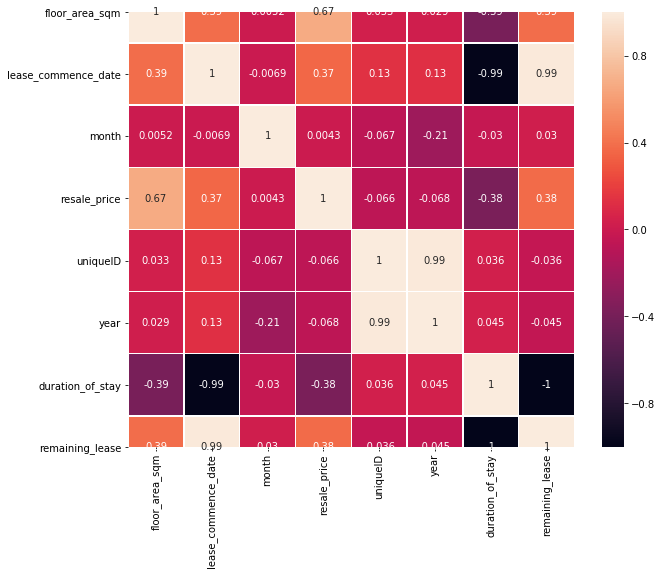

In [70]:
plt.figure(figsize=(10,8))
sns.heatmap(data1.corr(),annot=True,linewidth=0.5)
plt.show()

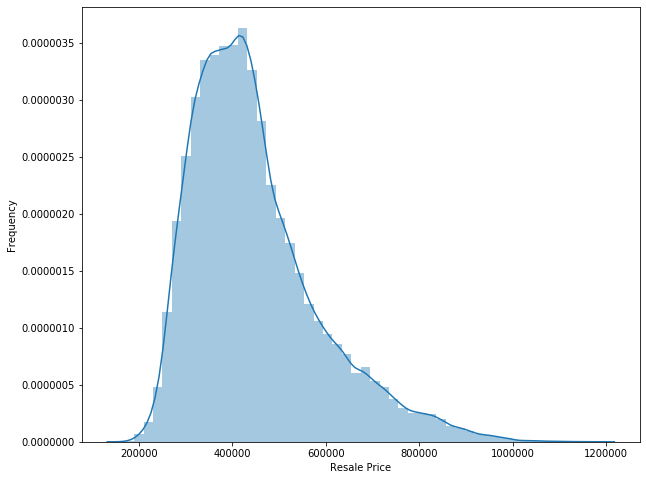

In [71]:
plt.figure(figsize=(10,8))
sns.distplot(data1['resale_price'])
plt.xlabel("Resale Price")
plt.ylabel("Frequency")
plt.show()

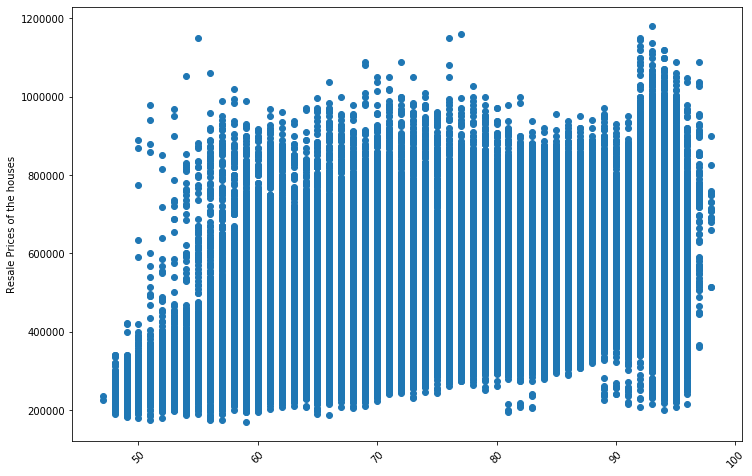

In [72]:
plt.figure(figsize=(12,8))
plt.scatter(data1['remaining_lease'],data1['resale_price'])
plt.xticks(label="No Of years of lease left",rotation=45)
plt.ylabel("Resale Prices of the houses")
plt.show()

In [75]:
"""""from matplotlib import rcParams
rcParams['figure.figsize'] = 10,7
plt.bar(data1["storey_in_range"],data1["resale_price"])
plt.title("Plot of Storey Range vs Resale Price")
plt.show()"""""

'""from matplotlib import rcParams\nrcParams[\'figure.figsize\'] = 10,7\nplt.bar(data1["storey_in_range"],data1["resale_price"])\nplt.title("Plot of Storey Range vs Resale Price")\nplt.show()'

In [76]:
data1.columns

Index(['flat_model', 'flat_type', 'floor_area_sqm', 'lease_commence_date',
       'month', 'resale_price', 'town', 'uniqueID', 'year', 'duration_of_stay',
       'storey_in_range', 'remaining_lease'],
      dtype='object')

In [77]:
test1.columns

Index(['month', 'town', 'flat_type', 'floor_area_sqm', 'flat_model',
       'lease_commence_date', 'uniqueID', 'year', 'duration_of_stay',
       'storey_in_range', 'remaining_lease'],
      dtype='object')

In [78]:
data1.dtypes

flat_model              object
flat_type               object
floor_area_sqm         float64
lease_commence_date      int64
month                    int64
resale_price           float64
town                    object
uniqueID                 int64
year                     int64
duration_of_stay         int64
storey_in_range         object
remaining_lease          int64
dtype: object

In [79]:
data1.year.unique()

array([2012, 2013, 2014, 2015, 2016, 2017, 2018])

In [80]:
test1.year.unique()

array([2018, 2019])

In [81]:
data1.lease_commence_date.nunique()

51

In [82]:
test1.lease_commence_date.nunique()

51

In [83]:
data1.drop(['year'],axis=1,inplace=True)
test1.drop(['year'],axis=1,inplace=True)

In [84]:
combi = pd.concat([data1,test1],axis=0)

In [85]:
combi.shape

(136898, 11)

In [86]:
for col in ["flat_model","flat_type","storey_in_range","town",'month']:
    combi[col]=combi[col].astype("category")

In [87]:
cat_col=["flat_model","flat_type","storey_in_range","town",'month']
num_col=['floor_area_sqm', 'lease_commence_date','duration_of_stay','remaining_lease']

In [88]:
train = combi.iloc[:115061,:]
test = combi.iloc[115062:,:]

In [89]:
X = train[['floor_area_sqm', 'lease_commence_date','duration_of_stay','remaining_lease',
           "flat_model","flat_type","storey_in_range","town",'month']]
y = train[['resale_price']]

In [90]:
X.shape

(115061, 9)

In [91]:
y.shape

(115061, 1)

In [92]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=123)

In [93]:
X_train.shape

(92048, 9)

In [94]:
test1.shape

(21837, 10)

In [95]:
X_train = pd.get_dummies(columns=cat_col,data=X_train,drop_first=False)
X_test = pd.get_dummies(columns=cat_col,data=X_test,drop_first=False)

In [96]:
X_train.shape

(92048, 83)

In [97]:
train = pd.get_dummies(columns=cat_col,data=train,drop_first=False)
test = pd.get_dummies(columns=cat_col,data=test,drop_first=False)

In [98]:
train.shape

(115061, 85)

In [99]:
test.shape

(21836, 85)

In [100]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train[num_col])

StandardScaler(copy=True, with_mean=True, with_std=True)

In [101]:
X_train[num_col]=sc.transform(X_train[num_col])
X_test[num_col]=sc.transform(X_test[num_col])
train[num_col]=sc.transform(train[num_col])
test[num_col]=sc.transform(test[num_col])

In [102]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [103]:
y_pred_train=lr.predict(X_train)
valid_pred_test=lr.predict(X_test)

In [104]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
print("The mean absolute error on train dataset:{}".format(mean_absolute_error(y_true=y_train,y_pred=y_pred_train)))
print("The mean squared error on train dataset:{}".format(mean_squared_error(y_true=y_train,y_pred = y_pred_train)))
print("The root mean squared error on train dataset:{}".format(np.sqrt(mean_squared_error(y_true=y_train,y_pred=y_pred_train))))


The mean absolute error on train dataset:39503.767917825484
The mean squared error on train dataset:2676615641.8808384
The root mean squared error on train dataset:51736.018805865206


In [105]:
print("The mean absolute error on test dataset:{}".format(mean_absolute_error(y_true=y_test,y_pred=valid_pred_test)))
print("The mean squared error  on test dataset:{}".format(mean_squared_error(y_true=y_test,y_pred=valid_pred_test)))
print("The root mean squared error on test dataset:{}".format(np.sqrt(mean_squared_error(y_true=y_test,y_pred=valid_pred_test))))


The mean absolute error on test dataset:39675.187029939596
The mean squared error  on test dataset:2708463507.0604315
The root mean squared error on test dataset:52042.90064034125


In [106]:
housing_values_test = pd.DataFrame()
housing_values_test[['Actual_Values']]=housing_values_test.append(pd.DataFrame(y_test,columns=['resale_price']),ignore_index=True)
housing_values_test[['Predicted_Values_LinearReg']]=pd.DataFrame(lr.predict(X_test))

In [107]:
housing_values_test.isna().sum()

Actual_Values                 0
Predicted_Values_LinearReg    0
dtype: int64

In [108]:
from sklearn.linear_model import Lasso
ls_reg = Lasso(alpha=0.1)
ls_reg.fit(X_train,y_train)

Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [109]:
ls_pred_train = ls_reg.predict(X_train)
ls_pred_test = ls_reg.predict(X_test)

In [110]:
print("The mean absolute error on train dataset :{}".format(mean_absolute_error(y_true=y_train,y_pred=ls_pred_train)))
print("The mean squared error on train dataset:{}".format(mean_squared_error(y_true=y_train,y_pred=ls_pred_train)))
print("The root mean squared error on train dataset:{}".format(np.sqrt(mean_squared_error(y_true=y_train,y_pred=ls_pred_train))))


The mean absolute error on train dataset :39501.99915212881
The mean squared error on train dataset:2674692836.2505426
The root mean squared error on train dataset:51717.432614646896


In [111]:
print("The mean absolute error on test dataset :{}".format(mean_absolute_error(y_true=y_test,y_pred=ls_pred_test)))
print("The mean squared error on test dataset:{}".format(mean_squared_error(y_true=y_test,y_pred=ls_pred_test)))
print("The root mean squared error on test dataset:{}".format(np.sqrt(mean_squared_error(y_true=y_test,y_pred=ls_pred_test))))


The mean absolute error on test dataset :39674.36675244784
The mean squared error on test dataset:2705973263.6339693
The root mean squared error on test dataset:52018.970228503844


In [112]:
from sklearn.tree import DecisionTreeRegressor
dt_reg = DecisionTreeRegressor(max_depth=4,random_state=0)
dt_reg.fit(X_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=4, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=0, splitter='best')

In [113]:
dt_pred_train=dt_reg.predict(X_train)
dt_pred_test=dt_reg.predict(X_test)

In [114]:
print("The mean absolute error on train dataset :{}".format(mean_absolute_error(y_true=y_train,y_pred=dt_pred_train)))
print("The mean squared error on train dataset:{}".format(mean_squared_error(y_true=y_train,y_pred=dt_pred_train)))
print("The root mean squared error on train dataset:{}".format(np.sqrt(mean_squared_error(y_true=y_train,y_pred=dt_pred_train))))


The mean absolute error on train dataset :63589.43054044887
The mean squared error on train dataset:7576243598.1228895
The root mean squared error on train dataset:87041.6199189956


In [115]:
print("The mean absolute error on test dataset :{}".format(mean_absolute_error(y_true=y_test,y_pred=dt_pred_test)))
print("The mean squared error on test dataset:{}".format(mean_squared_error(y_true=y_test,y_pred=dt_pred_test)))
print("The root mean squared error on test dataset:{}".format(np.sqrt(mean_squared_error(y_true=y_test,y_pred=dt_pred_test))))


The mean absolute error on test dataset :63162.52922413335
The mean squared error on test dataset:7581524894.165441
The root mean squared error on test dataset:87071.9523966555


In [116]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from scipy.stats import randint as sp_randint

In [117]:
rf_reg = RandomForestRegressor(n_estimators=20)
param_dist ={"max_depth" :[3,5],
            "min_samples_split":sp_randint(2.0,11.0),
            "max_features":sp_randint(2.0,11.0),
            "bootstrap":["True","False"],
            "criterion" :["mse"]}
n_iter_search=200
random_search = RandomizedSearchCV(rf_reg,param_distributions=param_dist,
                                  n_iter=n_iter_search,cv=5,refit=True,
                                  random_state=123)

In [119]:
random_search.fit(X_train,y_train)

RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=20, n_jobs=None,
                                                   oob_score=False,
                                                   random_state=N...


In [120]:
rf_pred_train = random_search.predict(X_train)
rf_pred_test = random_search.predict(X_test)

In [121]:
print("The mean absolute error on train dataset :{}".format(mean_absolute_error(y_true=y_train,y_pred=rf_pred_train)))
print("The mean squared error on train dataset:{}".format(mean_squared_error(y_true=y_train,y_pred=rf_pred_train)))
print("The root mean squared error on train dataset:{}".format(np.sqrt(mean_squared_error(y_true=y_train,y_pred=rf_pred_train))))


The mean absolute error on train dataset :64526.76207653044
The mean squared error on train dataset:7680213981.870503
The root mean squared error on train dataset:87636.83005375367


In [122]:
print("The mean absolute error on test dataset :{}".format(mean_absolute_error(y_true=y_test,y_pred=rf_pred_test)))
print("The mean squared error on test dataset:{}".format(mean_squared_error(y_true=y_test,y_pred=rf_pred_test)))
print("The root mean squared error on test dataset:{}".format(np.sqrt(mean_squared_error(y_true=y_test,y_pred=rf_pred_test))))
def mape(y_true,y_pred):
    y_true,y_pred = np.array(y_true),np.array(y_pred)
    return np.mean(np.abs((y_true-y_pred)/y_true))*100
print("The mean Absolute Percentage error on test dataset:{}".format(mape(y_true=y_test,y_pred=rf_pred_test)))

The mean absolute error on test dataset :64595.347072671364
The mean squared error on test dataset:7745019227.18591
The root mean squared error on test dataset:88005.79087302102
The mean Absolute Percentage error on test dataset:28.73470083398537


In [125]:
housing_values_test = pd.DataFrame()
housing_values_test[['Actual_Values']]=housing_values_test.append(pd.DataFrame(y_test,columns=['resale_price']),ignore_index=True)
housing_values_test[['Predicted_Values_RFReg']]=pd.DataFrame(random_search.predict(X_test))

In [126]:
housing_values_test.isna().sum()

Actual_Values             0
Predicted_Values_RFReg    0
dtype: int64

### For the competition

In [ ]:
train

In [ ]:
test

In [ ]:
train.columns

In [ ]:
test["resale_price"]=1.0

In [ ]:
X_train=train.drop(['resale_price'],axis=1)
y_train=train['resale_price']
X_test=test.drop(['resale_price'],axis=1)
y_test=test['resale_price']

In [ ]:
lr_reg=LinearRegression()
lr_reg.fit(X_train,y_train)

In [ ]:
y_pred_train=lr_reg.predict(X_train)
y_pred_test = lr_reg.predict(X_test)

In [ ]:
print("The root mean Squared error on train dataset: {}".format(np.sqrt(mean_squared_error(y_true=y_train,y_pred=y_pred_train))))

In [ ]:
print("The root mean Squared error on train dataset: {}".format(np.sqrt(mean_squared_error(y_true=y_test,y_pred=y_pred_test))))